## Síťová analýza: Vědecká korespondence v Británii 18.-19. století

V tomto notebooku si budeme prakticky osvojovat koncepty síťové analýzy. Z veřejně dostupných dat si vytvoříme několik síťových grafů, které budeme dále upravovat, analyzovat a vizualizovat.

Jedním z nejhodnotnějších typů historických dat jsou sbírky dopisů, které nám umožňují sledovat kdo, s kým a kdy udřžoval kontakty. Řada těchto dopisních sbírek byla v posledních dekádách digitalizována. Existují tak například digitalizované kolekce sbírkek dopisů středověkých žen (https://epistolae.ctl.columbia.edu/letters/) nebo rozsáhlá kolekce raně novověkých dopisů EMLO (=Early Modern Letters Online, )

In [2]:
import numpy as np
import pandas as pd
import requests
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#correspsearch = pd.read_csv("https://correspsearch.net/api/v2.0/csv.xql?d=1592-02-28-1670-11-15", sep=";")
correspsearch = pd.read_csv("https://correspsearch.net/api/v2.0/csv.xql?", sep=";")
correspsearch.head(10)

,sender,senderID,senderPlace,senderPlaceID,senderDate,addressee,addresseeID,addresseePlace,addresseePlaceID,addresseeDate,edition,key
0,Kf. Friedrich,http://d-nb.info/gnd/11853579X,NaN,NaN,NaN,Universität Wittenberg,http://d-nb.info/gnd/4032660-3,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,464
1,Alexius Crosner,http://d-nb.info/gnd/128693517,Leipzig,http://sws.geonames.org/2879139,1510,Julius Pflug,http://d-nb.info/gnd/118714082,keine Angabe,NaN,NaN,"Julius Pflug. Correspondance, recueillie et éd...",1
2,Melanchthon,http://d-nb.info/gnd/118580485,Tübingen,http://sws.geonames.org/2820860,NaN,"Geraeander, Paul",http://d-nb.info/gnd/1140261282,Tübingen,http://sws.geonames.org/2820860,NaN,Melanchthon Briefwechsel: Regesten online. Im ...,6a
3,Kf. Friedrich Hz. Johann,http://d-nb.info/gnd/11853579X http://d-nb.inf...,Torgau,http://sws.geonames.org/2821807,1513-01-06,Bf. Johann III. von Naumburg,http://d-nb.info/gnd/139152156,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,5
4,Räte Kf. Friedrichs,NaN,Torgau,http://sws.geonames.org/2821807,1513-01-14,Bf. [Hieronymus] von Brandenburg,http://d-nb.info/gnd/137650752,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,6
5,Bf. Hieronymus von Brandenburg,http://d-nb.info/gnd/137650752,Ziesar,http://sws.geonames.org/2804279,1513-01-24,Räte Kf. Friedrichs,NaN,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,7
6,Wolfgang Zesche Konvent des Augustinereremiten...,http://d-nb.info/gnd/7754053-0,[Herzberg],http://sws.geonames.org/2905504,1513-01-30,Kf. Friedrich,http://d-nb.info/gnd/11853579X,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,8
7,Dekan [Eucharius Spiecker] Kapitel des Mariens...,,[Eisenach],http://sws.geonames.org/2931574,1513-02-01,Kf. Friedrich Hz. Johann,http://d-nb.info/gnd/11853579X http://d-nb.inf...,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,9
8,Kf. Friedrich Hz. Johann,http://d-nb.info/gnd/11853579X http://d-nb.inf...,Weimar,http://sws.geonames.org/2812482,1513-03-06,Bf. Johann III. von Naumburg,http://d-nb.info/gnd/139152156,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,13
9,Kf. Friedrich,http://d-nb.info/gnd/11853579X,Eilenburg,http://sws.geonames.org/2931871,1513-03-16,Hz. Georg von Sachsen,http://d-nb.info/gnd/118716921,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,14


In [47]:
%%time
for n in range(2,30):
    page_df = pd.read_csv("https://correspsearch.net/api/v2.0/csv.xql?x=" + str(n), sep=";")
    correspsearch = pd.concat([correspsearch, page_df])
    if n in range(0,3000,100):
        print(n)
    if len(page_df) < 100:
        break

100
200
CPU times: user 4.16 s, sys: 467 ms, total: 4.63 s
Wall time: 2min 7s


In [48]:
len(correspsearch)

21023

In [57]:
# omezíme se pouze na 
correspsearch = correspsearch[correspsearch["sender"].notnull() & correspsearch["addressee"].notnull()]
len(correspsearch)

19184

In [58]:
correspsearch

,sender,senderID,senderPlace,senderPlaceID,senderDate,addressee,addresseeID,addresseePlace,addresseePlaceID,addresseeDate,edition,key
0,Kf. Friedrich,http://d-nb.info/gnd/11853579X,NaN,NaN,NaN,Universität Wittenberg,http://d-nb.info/gnd/4032660-3,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,464
1,Alexius Crosner,http://d-nb.info/gnd/128693517,Leipzig,http://sws.geonames.org/2879139,1510,Julius Pflug,http://d-nb.info/gnd/118714082,keine Angabe,NaN,NaN,"Julius Pflug. Correspondance, recueillie et éd...",1
2,Melanchthon,http://d-nb.info/gnd/118580485,Tübingen,http://sws.geonames.org/2820860,NaN,"Geraeander, Paul",http://d-nb.info/gnd/1140261282,Tübingen,http://sws.geonames.org/2820860,NaN,Melanchthon Briefwechsel: Regesten online. Im ...,6a
3,Kf. Friedrich Hz. Johann,http://d-nb.info/gnd/11853579X http://d-nb.inf...,Torgau,http://sws.geonames.org/2821807,1513-01-06,Bf. Johann III. von Naumburg,http://d-nb.info/gnd/139152156,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,5
4,Räte Kf. Friedrichs,NaN,Torgau,http://sws.geonames.org/2821807,1513-01-14,Bf. [Hieronymus] von Brandenburg,http://d-nb.info/gnd/137650752,NaN,NaN,NaN,Briefe und Akten zur Kirchenpolitik Friedrichs...,6
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Hz. Philipp von Pommern,http://d-nb.info/gnd/102324212,Wolgast,http://sws.geonames.org/2806501,1552-10-11,Mgf. Johann,http://d-nb.info/gnd/102111553,NaN,NaN,NaN,Politische Korrespondenz des Herzogs und Kurfü...,317a7
96,Damian von Sibottendorf,http://d-nb.info/gnd/140234977,Dresden,http://sws.geonames.org/2935022,1552-10-11,Kf. Moritz,http://d-nb.info/gnd/118584138,NaN,NaN,NaN,Politische Korrespondenz des Herzogs und Kurfü...,323a12
97,Ulrich Mordeisen,http://d-nb.info/gnd/119767058,Dresden,http://sws.geonames.org/2935022,1552-10-11,Kf. Moritz,http://d-nb.info/gnd/118584138,NaN,NaN,NaN,Politische Korrespondenz des Herzogs und Kurfü...,328a2
98,Ernst von Miltitz Georg Komerstadt Ulrich Mord...,http://d-nb.info/gnd/138386706 http://d-nb.inf...,Dresden,http://sws.geonames.org/2935022,1552-10-11,Kf. Moritz,http://d-nb.info/gnd/118584138,NaN,NaN,NaN,Politische Korrespondenz des Herzogs und Kurfü...,334a1


In [22]:
# navštívíme url adresu, kde jsou umístěny všechny csv soubory
# načteme HTTP odpověď do JSON formátu (není možné vždy, ale zde to funguje
resp_json = requests.get("https://github.com/cambridge-collection/epsilon-data/tree/main/csv").json()

Nyní si vypíšeme obsah načtených dat a zorientujeme v příslušné struktuře:

In [24]:
resp_json

{'payload': {'allShortcutsEnabled': False,
  'path': 'csv',
  'repo': {'id': 542535762,
   'defaultBranch': 'main',
   'name': 'epsilon-data',
   'ownerLogin': 'cambridge-collection',
   'currentUserCanPush': False,
   'isFork': False,
   'isEmpty': False,
   'createdAt': '2022-09-28T10:35:52.000Z',
   'ownerAvatar': 'https://avatars.githubusercontent.com/u/60095854?v=4',
   'public': True,
   'private': False,
   'isOrgOwned': True},
  'currentUser': None,
  'refInfo': {'name': 'main',
   'listCacheKey': 'v0:1664380801.622886',
   'canEdit': False,
   'refType': 'branch',
   'currentOid': 'a67ad584aa6afd616b88ef73e41c1d9d487591c1'},
  'tree': {'items': [{'name': 'ampere.csv',
     'path': 'csv/ampere.csv',
     'contentType': 'file'},
    {'name': 'darwin-correspondence.csv',
     'path': 'csv/darwin-correspondence.csv',
     'contentType': 'file'},
    {'name': 'darwin-family-letters.csv',
     'path': 'csv/darwin-family-letters.csv',
     'contentType': 'file'},
    {'name': 'farada

Vidíme, že ve struktuře je možné nalézt výpis jednotlivých `csv` souborů, které nás zajímají - nacházejí se pod tagem `"tree"`, ten je však zanořen v dalších tagách.

In [25]:
resp_json["payload"]["tree"]["items"]

[{'name': 'ampere.csv', 'path': 'csv/ampere.csv', 'contentType': 'file'},
 {'name': 'darwin-correspondence.csv',
  'path': 'csv/darwin-correspondence.csv',
  'contentType': 'file'},
 {'name': 'darwin-family-letters.csv',
  'path': 'csv/darwin-family-letters.csv',
  'contentType': 'file'},
 {'name': 'faraday.csv', 'path': 'csv/faraday.csv', 'contentType': 'file'},
 {'name': 'henslow.csv', 'path': 'csv/henslow.csv', 'contentType': 'file'},
 {'name': 'herschel.csv', 'path': 'csv/herschel.csv', 'contentType': 'file'},
 {'name': 'kemp.csv', 'path': 'csv/kemp.csv', 'contentType': 'file'},
 {'name': 'linnean-society.csv',
  'path': 'csv/linnean-society.csv',
  'contentType': 'file'},
 {'name': 'royal-society.csv',
  'path': 'csv/royal-society.csv',
  'contentType': 'file'},
 {'name': 'somerville.csv',
  'path': 'csv/somerville.csv',
  'contentType': 'file'},
 {'name': 'tyndall.csv', 'path': 'csv/tyndall.csv', 'contentType': 'file'}]

In [30]:
filenames = [item["name"] for item in resp_json["payload"]["tree"]["items"]]
filenames

['ampere.csv',
 'darwin-correspondence.csv',
 'darwin-family-letters.csv',
 'faraday.csv',
 'henslow.csv',
 'herschel.csv',
 'kemp.csv',
 'linnean-society.csv',
 'royal-society.csv',
 'somerville.csv',
 'tyndall.csv']

In [31]:
linnean = pd.read_csv("https://raw.githubusercontent.com/cambridge-collection/epsilon-data/main/csv/linnean-society.csv")
linnean.head()

,id,sender_surname,sender_forename,recipient_surname,recipient_forename,sorting_date,date,sender_address,recipient_address,source,languages,extent,filename
0,LINNEAN1,Abbot,Charles,Smith,Sir James Edward,1807-11-02,2 Nov 1807,"Bedford, Bedfordshire",NaN,"GB-110/JES/ADD/1, The Linnean Society of London",eng,NaN,LINNEAN1.xml
1,LINNEAN2,Butt,John Martin,Smith,Sir James Edward,1798-09-17,17 Sep 1798,"Witley, Worcestershire",NaN,"GB-110/JES/ADD/10, The Linnean Society of London",eng,NaN,LINNEAN2.xml
2,LINNEAN3,Strutt,Jacob George,Smith,Sir James Edward,1826-05-31,31 May 1826,London,NaN,"GB-110/JES/ADD/100, The Linnean Society of London",eng,NaN,LINNEAN3.xml
3,LINNEAN4,Swainson,William,Smith,Sir James Edward,1815-04-22,22 Apr 1815,"Palermo, Sicily",London,"GB-110/JES/ADD/101, The Linnean Society of London",eng,NaN,LINNEAN4.xml
4,LINNEAN5,Teesdale,Robert,Smith,Sir James Edward,1789-11-18,18 Nov 1789,London,London,"GB-110/JES/ADD/102, The Linnean Society of London",eng,NaN,LINNEAN5.xml


Vidíme zde výpis prvních pěti řádek datové tabulky. Ale kolik vlastně tabulka čítá položek a kolik že je sloupců? To zjistíme z atributu `shape` (atributem je vlastnost datového objektu - jednou z vlastností datového objektu podle standardu `pd.DataFrame` je jeho tvar, tj. počet řádků a sloupců. 

In [43]:
linnean.shape

(3538, 14)

Než se pustíme do síťových analýz, ještě si upravíme hodnoty v některých sloupcích tak, aby se nám s nimi dobře pracovalo. Sloupec `"sorting_date"` vyjadřuje dataci daného dopisu ve velice úhledném a srozumitelném formátu (yyyy-mm-dd). Jelikož jsme však naše data načetl z prostého `csv` souboru, Python neví nic o tom, že za touto řadou čísel a pomlček se jedná o dataci; k tomu jej musíme nainstruovat.

V buňce níže za tímto účelem vytváříme nový sloupec s výmluvným názvem `"datetime"`. Hodnoty v tomto sloupci jsou výsledkem použití (aplikování) funkce `to_datetime()` z knihovny pandas (`pd`) na hodnoty ve sloupci `"sorting_date"`. Tato funkce "přeloží" jednotlivá čísla na roky, měsíce a dny.

In [45]:
linnean["datetime"] = linnean["sorting_date"].apply(pd.to_datetime)
linnean.head(5)

,id,sender_surname,sender_forename,recipient_surname,recipient_forename,sorting_date,date,sender_address,recipient_address,source,languages,extent,filename,datetime
0,LINNEAN1,Abbot,Charles,Smith,Sir James Edward,1807-11-02,2 Nov 1807,"Bedford, Bedfordshire",NaN,"GB-110/JES/ADD/1, The Linnean Society of London",eng,NaN,LINNEAN1.xml,1807-11-02
1,LINNEAN2,Butt,John Martin,Smith,Sir James Edward,1798-09-17,17 Sep 1798,"Witley, Worcestershire",NaN,"GB-110/JES/ADD/10, The Linnean Society of London",eng,NaN,LINNEAN2.xml,1798-09-17
2,LINNEAN3,Strutt,Jacob George,Smith,Sir James Edward,1826-05-31,31 May 1826,London,NaN,"GB-110/JES/ADD/100, The Linnean Society of London",eng,NaN,LINNEAN3.xml,1826-05-31
3,LINNEAN4,Swainson,William,Smith,Sir James Edward,1815-04-22,22 Apr 1815,"Palermo, Sicily",London,"GB-110/JES/ADD/101, The Linnean Society of London",eng,NaN,LINNEAN4.xml,1815-04-22
4,LINNEAN5,Teesdale,Robert,Smith,Sir James Edward,1789-11-18,18 Nov 1789,London,London,"GB-110/JES/ADD/102, The Linnean Society of London",eng,NaN,LINNEAN5.xml,1789-11-18


Ač hodnoty ve sloupci `"datetime"` vypadají stejně jako hodnoty ve sloupci `"sorting_date"`, chovají se odlišně. Umožňují nám přímo studovat časovou distribuci našich dat. Výhody tohoto formátu si všimneme, když na daný sloupec aplikujeme vizualizační metodu `hist()`:

<Axes: >

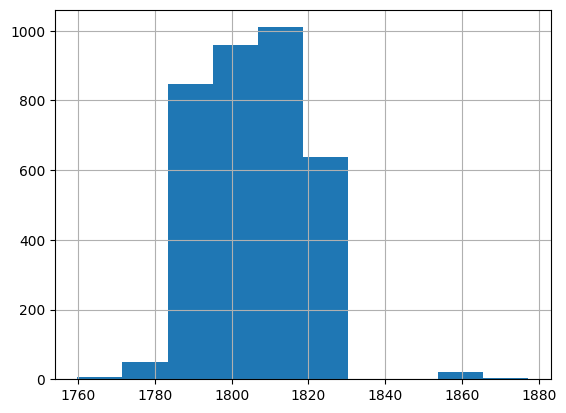

In [46]:
linnean["datetime"].hist()

In [47]:
linnean["18thcent?"] = linnean["datetime"] < pd.to_datetime("1801-01-01")

In [54]:
linnean["sender_agr"] = linnean.apply(lambda row: str(row["sender_surname"]).replace(" ", "_") + "_" + str(row["sender_forename"]).replace(" ", "_"), axis=1)

linnean["recipient_agr"] = linnean.apply(lambda row: str(row["recipient_surname"]).replace(" ", "_") + "_" + str(row["recipient_forename"]).replace(" ", "_"), axis=1)

In [53]:
linnean["sender_agr"].value_counts()

sender_agr
Smith_Sir_James_Edward       481
Goodenough_Samuel            222
Woodward_Thomas_Jenkinson    101
Roscoe_William                98
Johnes_Thomas                 84
                            ... 
Erskine_David_Steuart          1
Upcher_Abbot                   1
Walcott_William                1
Baker_William_Lloyd            1
Cullen_Charles_Sinclair        1
Name: count, Length: 457, dtype: int64

In [57]:
linnean["recipient_agr"].value_counts()

recipient_agr
Smith_Sir_James_Edward    2948
Macleay_Alexander          102
Smith_Pleasance             72
Roscoe_William              53
Unknown_nan                 51
                          ... 
Sutton_Charles               1
Brandreth_Mrs                1
Bright_Richard               1
Walker_George                1
Reeve_Robert                 1
Name: count, Length: 65, dtype: int64

In [62]:
linnean_edges = linnean.groupby(["sender_agr", "recipient_agr"]).size().reset_index()
linnean_edges.columns = ["sender_agr", "recipient_agr", "letters_n"]
linnean_edges.head()

,sender_agr,recipient_agr,letters_n
0,Abbot_Charles,Smith_Sir_James_Edward,18
1,Acharius_Erik,Smith_Sir_James_Edward,8
2,Acrel_Johan_Gustaf,Smith_Sir_James_Edward,7
3,Afzelius_Adam,Smith_Sir_James_Edward,14
4,Aiton_William_Townsend,Smith_Sir_James_Edward,1


In [155]:
linnean_edges.sort_values("letters_n", ascending=False)

,sender_agr,recipient_agr,letters_n
189,Goodenough_Samuel,Smith_Sir_James_Edward,222
413,Smith_Sir_James_Edward,Macleay_Alexander,102
525,Woodward_Thomas_Jenkinson,Smith_Sir_James_Edward,101
348,Roscoe_William,Smith_Sir_James_Edward,94
241,Johnes_Thomas,Smith_Sir_James_Edward,83
...,...,...,...
352,Rous_Charlotte_Maria,Smith_Sir_James_Edward,1
353,Rowden_Frances_Arabella,Smith_Sir_James_Edward,1
158,Erskine_David_Steuart,Smith_Sir_James_Edward,1
157,Engelhart_John_Henry,Smith_Sir_James_Edward,1


In [158]:
G = nx.from_pandas_edgelist(linnean_edges, 'sender_agr', 'recipient_agr', 'letters_n', create_using=nx.DiGraph())

In [159]:
type(G)

networkx.classes.digraph.DiGraph

In [160]:
len(G.nodes())

476

In [161]:
len(G.edges())

534

In [163]:
G["Smith_Sir_James_Edward"]["Macleay_Alexander"]

{'letters_n': 102}

In [164]:
G["Macleay_Alexander"]["Smith_Sir_James_Edward"]


{'letters_n': 74}

In [165]:
to_remove = []
edges_met = []
for node1, node2 in G.edges():
    if (G.has_edge(node2, node1)) & ((node2, node1) not in edges_met):
        G[node1][node2]["letters_n"] = G[node1][node2]["letters_n"] + G[node2][node1]["letters_n"]
        to_remove.append((node2, node1))
    edges_met.append((node1, node2))

In [166]:
len(edges_met)

534

In [167]:
len(to_remove)

37

In [168]:
for u,v in to_remove:
    G.remove_edge(u,v)

In [169]:
G = G.to_undirected().copy()

In [170]:
len(G.edges())

497

In [172]:
G["Smith_Sir_James_Edward"]["Macleay_Alexander"]

{'letters_n': 176}

In [173]:
G["Macleay_Alexander"]["Smith_Sir_James_Edward"]

{'letters_n': 176}

In [176]:
weighted_degrees = {}
for node in G.nodes():
    weighted_degrees[node] = G.degree(node, weight='letters_n')

In [177]:
weighted_degrees

{'Abbot_Charles': 18,
 'Smith_Sir_James_Edward': 3429,
 'Acharius_Erik': 8,
 'Acrel_Johan_Gustaf': 7,
 'Afzelius_Adam': 14,
 'Aiton_William_Townsend': 1,
 'Allioni_Carlo': 7,
 'Anderson_Alexander': 2,
 'Anderson_James': 2,
 'Anguish_Mrs_S': 1,
 'Annesley_George': 19,
 'Anonymous_nan': 2,
 'Unknown_nan': 46,
 'Anstruther_Sir_John': 1,
 'Arnott_George_Arnold_Walker': 1,
 'Aufrere_Anthony': 1,
 'Babington_William': 2,
 'Backhouse_James': 2,
 'Bagg_C_J': 1,
 'Baillie_Matthew': 8,
 'Bainbridge_J_H': 1,
 'Baker_J': 1,
 'Baker_John': 2,
 'Baker_Richard': 2,
 'Baker_William_Lloyd': 1,
 'Balbis_Giovanni_Battista': 1,
 'Baldwin_John': 2,
 'Baldwin_William': 2,
 'Banfather_Henry': 1,
 'Banks_Sir_Joseph': 52,
 'Barclay_Robert': 3,
 'Barker_Edmund_Henry': 5,
 'Barnwell_Frederick_Henry_Turnor': 1,
 'Barrington_Jane': 13,
 'Lambert_Aylmer_Bourke': 81,
 'Barrington_Shute': 8,
 'Bateman_James': 1,
 'Beadon_Richard': 1,
 'Sutton_Charles': 3,
 'Beattie_James': 3,
 'Beeke_Henry': 3,
 'Bellardi_Carlo_Anton

In [178]:
# set new node attribute on the basis of values from the weighted_degrees
nx.set_node_attributes(G, weighted_degrees, 'weighted_degree')

In [213]:
#node_list = [node for node, data in G.nodes(data=True) if data["weighted_degree"]>=5]
node_list = [node for node in G.nodes if G.degree(node) >= 2]
len(node_list)

35

In [214]:
node_list

['Smith_Sir_James_Edward',
 'Anonymous_nan',
 'Unknown_nan',
 'Barrington_Jane',
 'Lambert_Aylmer_Bourke',
 'Sutton_Charles',
 'Bicheno_James_Ebenezer',
 'Forster_Edward',
 'Boyd_George',
 'Roxburgh_William',
 'Brodie_James',
 'Cavanilles_Antonio_José',
 'Coke_Thomas_William',
 'Wallich_Nathaniel',
 'Crowe_James',
 'Cullum_Sir_Thomas_Gery',
 'Smith_Pleasance',
 'Davall_Edmund',
 'Davy_Martin',
 'Don_George',
 'Goodenough_Samuel',
 'Drake_William_Fitt',
 'Frankland_Sir_Thomas',
 'Gemmellaro_Carlo',
 'The_Linnean_Society_nan',
 'Gurney_Anna',
 'Harriman_John',
 'Hawkins_John',
 'Johnes_Thomas',
 'Latham_John',
 'Martyn_Thomas',
 'Roscoe_William',
 'Smith_James',
 'Swartz_Olof_Peter',
 'Webb_William']

In [215]:
Gsub = G.subgraph(node_list)

In [216]:
edge_widths = [np.sqrt(d['letters_n']) / 2 for (u, v, d) in Gsub.edges(data=True)]

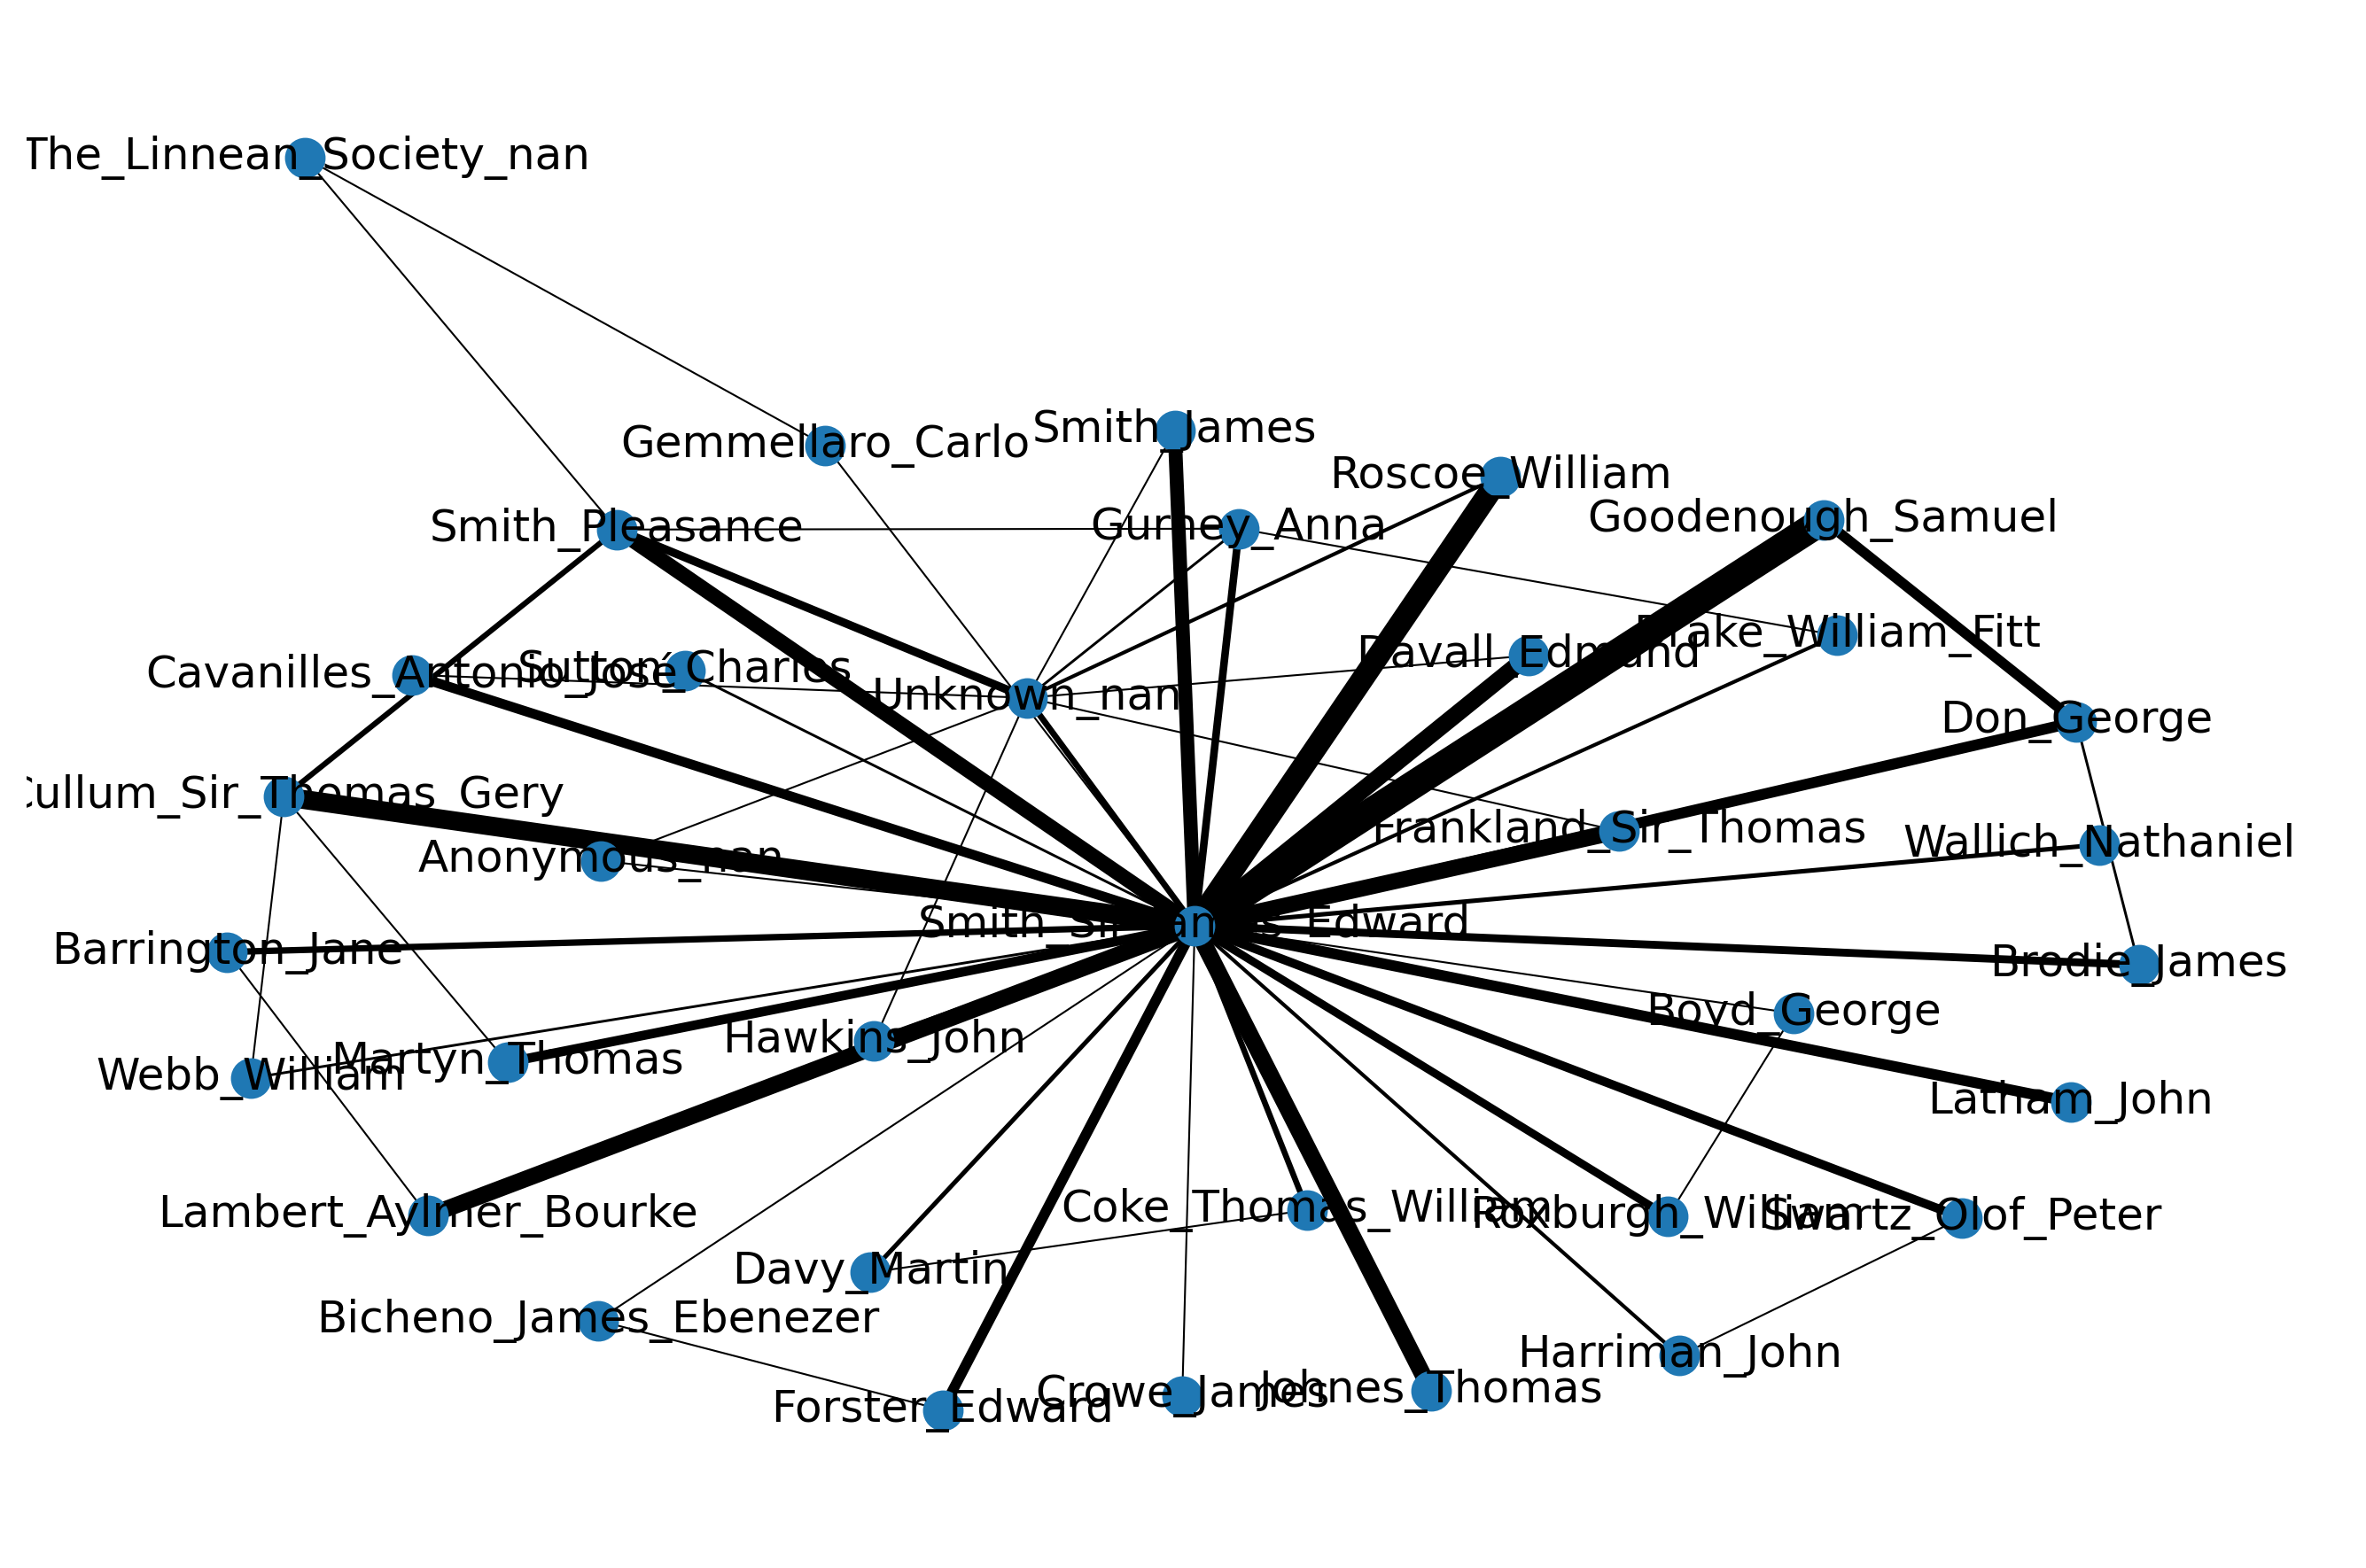

In [217]:
fig, ax = plt.subplots(1,1, figsize=(9, 6), dpi=300, tight_layout=True)
nx.draw(Gsub, with_labels=True, pos=nx.kamada_kawai_layout(Gsub), node_size=100, nodelist=node_list, width=edge_widths, ax=ax)

In [195]:
len(G)

476